In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules


In [2]:
df=pd.read_excel(r"D:\Final_Project\ASSOCIATIVE LEARNING\patient_risk_factor_association_with_age_gender.xlsx")

In [3]:
df

,hypertension,diabetes,obesity,smoking,high_cholesterol,age,gender
0,0,1,1,0,0,50,Female
1,1,0,1,0,0,45,Female
2,0,1,1,1,0,58,Male
3,1,1,1,0,1,71,Male
4,1,0,0,0,0,39,Female
...,...,...,...,...,...,...,...
995,1,1,1,1,1,62,Female
996,1,0,0,0,0,55,Female
997,0,0,1,0,0,46,Male
998,0,1,0,0,0,36,Female


C:\Users\ashwi\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\ashwi\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\ashwi\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


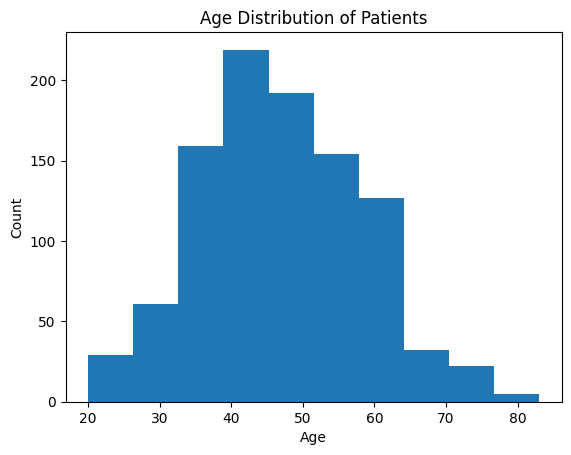

In [4]:
plt.hist(df["age"], bins=10)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

📌 Insight:

“Most patients fall in middle-aged and elderly groups, which is clinically relevant for chronic diseases.

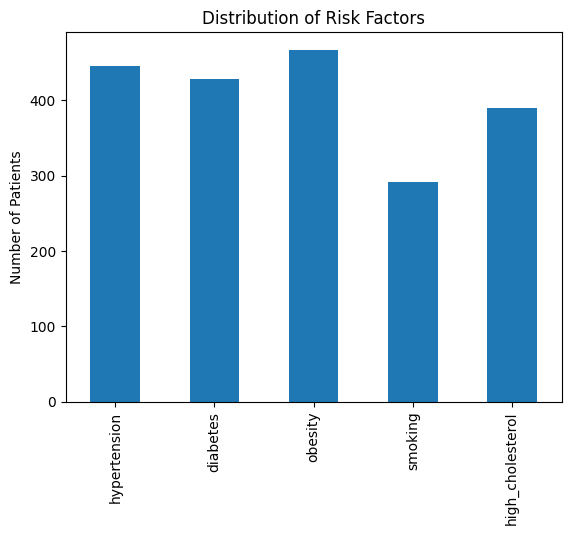

In [5]:
import matplotlib.pyplot as plt

risk_cols = [
    "hypertension", "diabetes", "obesity",
    "smoking", "high_cholesterol"
]

df[risk_cols].sum().plot(kind="bar")
plt.title("Distribution of Risk Factors")
plt.ylabel("Number of Patients")
plt.show()

📌 Insight:

Obesity & hypertension are most frequent

Justifies strong associations with heart disease

In [6]:
# Create age groups (VERY IMPORTANT)
df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 30, 45, 60, 100],
    labels=["Young", "Mid", "Senior", "Elderly"]
)

# Drop raw age (association works on categories)
#df = df.drop(columns=["age"])


C:\Users\ashwi\AppData\Local\Temp\ipykernel_2856\1601846202.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_risk = df.groupby("age_group")[risk_cols].mean()


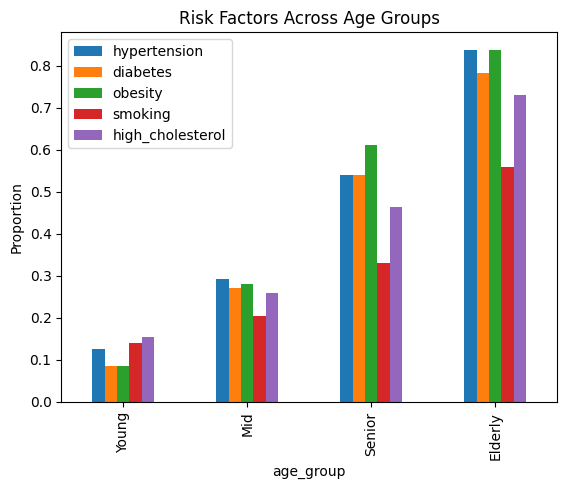

In [7]:
age_risk = df.groupby("age_group")[risk_cols].mean()
age_risk.plot(kind="bar")
plt.title("Risk Factors Across Age Groups")
plt.ylabel("Proportion")
plt.show()

📌 Insight:

Senior/Elderly → higher hypertension & diabetes

Justifies age-based associations

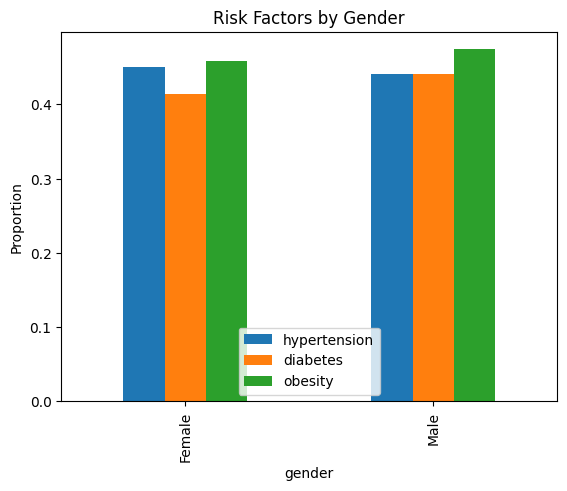

In [8]:

gender_risk = df.groupby("gender")[["hypertension", "diabetes", "obesity"]].mean()
gender_risk.plot(kind="bar")
plt.title("Risk Factors by Gender")
plt.ylabel("Proportion")
plt.show()


📌 Insight:

“Male patients show higher prevalence of cardiovascular risk factors, supporting gender-based risk modeling.”

Risk Factor Co-Occurrence

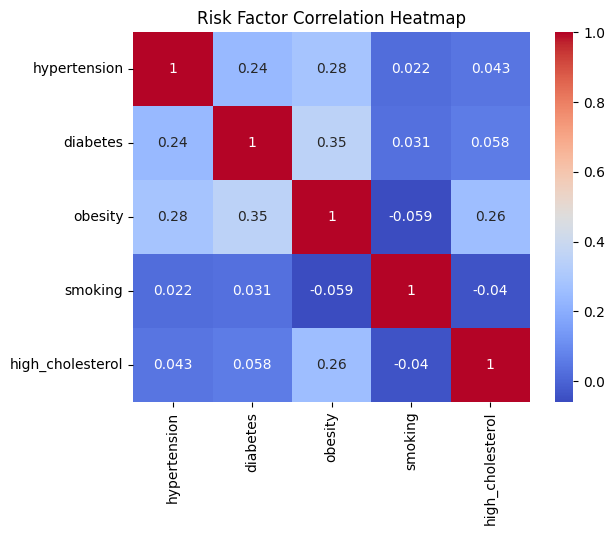

In [9]:
import seaborn as sns

corr = df[risk_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Risk Factor Correlation Heatmap")
plt.show()


📌 Insight:

Obesity ↔ Diabetes ↔ Hypertension strongly correlated

Confirms association rule learning is appropriate

Combination Frequency (Direct Association Evidence)

In [10]:
df["obesity_diabetes"] = df["obesity"] & df["diabetes"]
df["obesity_hypertension"] = df["obesity"] & df["hypertension"]

df[["obesity_diabetes", "obesity_hypertension"]].mean()


obesity_diabetes        0.287
obesity_hypertension    0.278
dtype: float64

In [11]:
# One-hot encode age_group and gender
df_encoded = pd.get_dummies(
    df,
    columns=["age_group", "gender"],
    drop_first=False
)

In [12]:
df1=df_encoded.map(lambda x:1 if x is True else 0 if x is False else x)

In [13]:
df1.drop(columns=["age"], inplace=True)

In [14]:
df1

,hypertension,diabetes,obesity,smoking,high_cholesterol,obesity_diabetes,obesity_hypertension,age_group_Young,age_group_Mid,age_group_Senior,age_group_Elderly,gender_Female,gender_Male
0,0,1,1,0,0,1,0,0,0,1,0,1,0
1,1,0,1,0,0,0,1,0,1,0,0,1,0
2,0,1,1,1,0,1,0,0,0,1,0,0,1
3,1,1,1,0,1,1,1,0,0,0,1,0,1
4,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,1,1,1,1,1,0,0,0,1,1,0
996,1,0,0,0,0,0,0,0,0,1,0,1,0
997,0,0,1,0,0,0,0,0,0,1,0,0,1
998,0,1,0,0,0,0,0,0,1,0,0,1,0


# Apriori Association Rule Learning

In [15]:
frequent_itemsets = apriori(
    df1,
    min_support=0.15,
    use_colnames=True
)

rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.5
)
rules.head()




c:\Users\ashwi\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(diabetes),(hypertension),0.428,0.445,0.250,0.584112,1.312612,1.0,0.059540,1.334494,0.416364,0.401284,0.250653,0.572955
1,(hypertension),(diabetes),0.445,0.428,0.250,0.561798,1.312612,1.0,0.059540,1.305333,0.429117,0.401284,0.233912,0.572955
2,(hypertension),(obesity),0.445,0.467,0.278,0.624719,1.337728,1.0,0.070185,1.420269,0.454890,0.438486,0.295908,0.610004
3,(obesity),(hypertension),0.467,0.445,0.278,0.595289,1.337728,1.0,0.070185,1.371349,0.473666,0.438486,0.270791,0.610004
4,(obesity_diabetes),(hypertension),0.287,0.445,0.198,0.689895,1.550327,1.0,0.070285,1.789719,0.497861,0.370787,0.441253,0.567420


In [16]:
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
0,(diabetes),(hypertension),0.250,0.584112,1.312612
1,(hypertension),(diabetes),0.250,0.561798,1.312612
2,(hypertension),(obesity),0.278,0.624719,1.337728
3,(obesity),(hypertension),0.278,0.595289,1.337728
4,(obesity_diabetes),(hypertension),0.198,0.689895,1.550327
...,...,...,...,...,...
229,"(diabetes, obesity)","(obesity_hypertension, obesity_diabetes, hyper...",0.198,0.689895,3.484321
230,"(obesity_diabetes, diabetes)","(obesity_hypertension, hypertension, obesity)",0.198,0.689895,2.481638
231,"(obesity_diabetes, obesity)","(obesity_hypertension, diabetes, hypertension)",0.198,0.689895,3.484321
232,(obesity_hypertension),"(diabetes, obesity_diabetes, hypertension, obe...",0.198,0.712230,3.597122


# Human-Readable Risk Labels

In [ ]:
RISK_LABELS = {
    "obesity": "BMI > 30",
    "hypertension": "High Blood Pressure",
    "diabetes": "Diabetes",
    "smoking": "Smoking",
    "high_cholesterol": "High Cholesterol",

    "age_group_Young": "Age < 30",
    "age_group_Mid": "Age 30–45",
    "age_group_Senior": "Age 45–60",
    "age_group_Elderly": "Age > 60",

    "gender_Male": "Male",
    "gender_Female": "Female"
}


# Derived Lung & Heart Disease Risk Logic

In [ ]:
def calculate_disease_risk(factors, confidence, disease):
    base_risk = confidence * 100

    lung_weights = {
        "smoking": 0.30,
        "age_group_Senior": 0.20,
        "age_group_Elderly": 0.30,
        "obesity": 0.15,
        "high_cholesterol": 0.10
    }

    heart_weights = {
        "hypertension": 0.30,
        "diabetes": 0.25,
        "obesity": 0.20,
        "smoking": 0.15,
        "age_group_Senior": 0.25,
        "age_group_Elderly": 0.35,
        "gender_Male": 0.10
    }

    weights = lung_weights if disease == "lung" else heart_weights
    modifier = sum(weights.get(f, 0) for f in factors)

    return min(int(base_risk + modifier * 100), 95)


# Generate Derived Disease Risks from Rules

In [ ]:
def derive_disease_risks(rule):
    factors = list(rule["antecedents"])
    confidence = rule["confidence"]

    derived = []

    if "smoking" in factors:
        lung_risk = calculate_disease_risk(factors, confidence, "lung")
        derived.append(("Lung Disease", lung_risk))

    if any(f in factors for f in ["hypertension", "diabetes", "obesity"]):
        heart_risk = calculate_disease_risk(factors, confidence, "heart")
        derived.append(("Heart Disease", heart_risk))

    return derived


# Display Explainable Results (Console Version)

In [ ]:
for _, rule in rules.iterrows():
    readable_factors = [
        RISK_LABELS.get(f, f) for f in rule["antecedents"]
    ]

    derived_risks = derive_disease_risks(rule)

    for disease, risk in derived_risks:
        print(" + ".join(readable_factors))
        print(f"→ {disease} Risk {risk}%")
        print("-" * 50)


In [ ]:
import pickle

with open("association_rules.pkl", "wb") as f:
    pickle.dump(rules, f)


